Harshali Wadge

Knight Lab, Helen Wills Neuroscience Institute, UC Berkeley
2017

In [1]:
import scipy
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd

These global variables are hardcoded. Each is a list, and all lists describing pairs are ordered in the sequence in FILE LIST -  the list of pair names. 

CATEGORIES - <i> Strings </i> - The different categories used to classify specific strategies that subjects use. These categories are used in calculating each pair's general similarity. 

STRATEGIES - <i> Ints and String 'inf' </i> - A list of the specific strategies observed across subjects. Each strategy belongs to a specific category, defined above.

file_list - <i> Chars </i> - The list of pairs in the order they appear in the file directory.

PAIR_TYPE - <i> Ints </i> - Entries indicate what type each pair in FILE_LIST is. 1 is purely ASD, 2 is control, and 3 is mixed.

success_ratios - <i> Floats </i> - Each pair's success rate, which is defined by how many of the 80 trials the pair was able to reach the goal configuration. 

data_summary_order - <i> Strings </i> - Order of the variables as written in data_summary.csv and the data_summary structure. 

TRIAL_DIFFICULTY - <i> Ints </i> - Diffulty rating between 1 - 4 for each of the 80 trials.

PAIRS - <i> Pair Objects </i> - All pairs collected in one list. Built as raw data is read.

GROUP_1 - <i> Pair Objects </i> - Only ASD pairs

GROUP_2 - <i> Pair Objects </i> - Control pairs

GROUP_3 - <i> Pair Objects </i> - Mixed pairs
 

In [2]:
CATEGORIES = ['PAUSE', 'WIGGLE', 'CIRCLE', 'ROTATE', 'LINE']
STRATEGIES = [str(float(i)) for i in range(1,17)]
STRATEGIES.append('inf')
PAIR_TYPE = [2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 2, 1, 2, 3, 1, 1, 2, 3, 3, 2]
file_list = ['V', 'H', 'O', 'M', 'R', 'U', 'S', 'W', 'A', 'B', 'F', 'Y', 'K', 'I', 'L', 'N', 'Z', 'E', 'T', 'P', 'D', 'C', 'X', 'J', 'Q', 'G']
success_ratios = [82.5, 76.25, 63.75, 18.75,91.25,73.75,86.25,51.25,92.5,48.75,43.75,63.75,57.5,18.75,45,11.25,75,66.25,87.5,91.25,60,38.75,88.75,53.75,76.25,78.75]
data_summary_order = ['Pair Name', 'Exact Similarity', 'General Similarity', 'Overall Correlation', 'Pair Type', 'Success Rate']
TRIAL_DIFFICULTY = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3]
PAIRS = [] #all Pairs
GROUP_1 = [] #only ASD
GROUP_2 = [] #controls
GROUP_3 = [] #mixed
GROUPS = [GROUP_1, GROUP_2, GROUP_3]
ASD_SUBJECTS = []
CONTROL_SUBJECTS = []

In [3]:

df = pd.read_csv('TCG_data.csv',index_col=0)
df_group1 = df['A':'L']
df_group2 = df['G':'Z']
df_group3 = df['I':'Q']
df

,S1Age,S2Age,Pair_gender,pair_type_ASD_presence,Pair_type,S1ASDgroup,S2ASDgroup,S1BDI,S2BDI,S1TA,...,S1IQ,S2IQ,S1AQ,S2AQ,S1ADOS_score,S1ADOS_category,S2ADOS_score,S2ADOS_category,Pair_overall_success,mean_IQ
Pair_name,,,,,,,,,,,,,,,,,,,,,
A,25,35,1,1,1,1,1,9,9,46,...,133,127,39,41,9,1,6,0,92.50,130.0
B,35,20,1,1,1,1,1,17,3,45,...,112,107,42,35,10,2,10,2,48.75,109.5
C,35,35,1,1,1,1,1,6,2,53,...,108,105,36,19,8,1,11,2,38.75,106.5
D,29,30,1,1,1,1,1,9,11,27,...,135,118,29,37,2,0,11,2,60.00,126.5
E,18,22,1,1,1,1,1,30,8,54,...,92,101,31,36,9,1,6,0,66.25,96.5
F,33,19,1,1,1,1,1,10,13,51,...,128,104,35,28,9,1,7,0,43.75,116.0
L,25,20,2,1,1,1,1,28,18,63,...,96,93,39,46,1,0,7,1,45.00,94.5
G,27,30,1,0,2,0,0,1,4,30,...,114,102,15,15,#NULL!,#NULL!,#NULL!,#NULL!,78.75,108.0
H,21,29,1,0,2,0,0,11,0,58,...,109,125,19,13,#NULL!,#NULL!,#NULL!,#NULL!,76.25,117.0


Each pair object is initialized by 2 SUBJECTS, the pair's index in FILE_LIST, and the letter assigned to it (name).  

In [4]:
class Pair:
    def __init__(self, subA, subB, index, name):
        self.subjA = subA
        self.subjB = subB
        
        if df.get_value(name, 'S1ASDgroup') == 1.0:
            self.subjA.ASD = 1
            ASD_SUBJECTS.append(self.subjA)
        else:
            CONTROL_SUBJECTS.append(self.subjA)
        
        if df.get_value(name, 'S2ASDgroup') == 1.0:
            self.subjB.ASD = 1
            ASD_SUBJECTS.append(self.subjB)
        else:
            CONTROL_SUBJECTS.append(self.subjB)
        
        self.index = index
        self.name = name
        self.type = PAIR_TYPE[index]
        if self.type == 1:
            GROUP_1.append(self)
        elif self.type == 2:
            GROUP_2.append(self)
        else:
            GROUP_3.append(self)
        self.success = success_ratios[index]
        self.strategies = []
        self.overall_correlation = 0.0
        self.exact_similarity_list = []
        self.exact_similarity = 0.0
        self.general_similarity_list = []
        self.general_similarity = 0.0
        self.off_by_one_list = []
        self.off_by_one_similarity = 0.0
        self.alignment_bool_array = []
        


    def find_exact_strat_similarity(self):
        total = 0.0
        total_B = 0.0
        for trial in range(len(self.subjA.strategy_list)):
            if self.subjB.strategy_list[trial] == self.subjA.strategy_list[trial]:
                self.exact_similarity_list.append(self.subjA.strategy_list[trial])
                total += 1
                total_B +=1
                self.alignment_bool_array.append(1)
            else:
                self.exact_similarity_list.append(0)
                self.alignment_bool_array.append(0)
        self.exact_similarity = total/len(self.subjB.strategy_list)
        self.subjB.alignment = self.exact_similarity

    def find_general_strat_similarity(self):
        self.general_strat_list = []
        total = 0.0
        for trial in range(len(self.subjA.strategy_list)):
            self.general_strat_list.append(self.subjA.general_list[trial])
            self.general_strat_list.append(self.subjB.general_list[trial])
            if self.subjB.general_list[trial] == self.subjA.general_list[trial]:
                self.general_similarity_list.append(self.subjA.general_list[trial])
                total += 1
            else:
                self.general_similarity_list.append(0)
        self.general_similarity = total/len(self.subjB.strategy_list)
        
    def find_exact_strat_similarity_off_by_one(self):
        off_by_one_list = []
        total = 0.0
        total_A = 0.0

        for trial in range(len(self.subjA.strategy_list)-1):
            if self.subjB.strategy_list[trial] == self.subjA.strategy_list[trial+1]:
                self.off_by_one_list.append(1)
                total += 1
                total_A +=1
            else:
                self.off_by_one_list.append(0)
        self.off_by_one_similarity = total/39
        self.subjA.alignment = self.off_by_one_similarity

    
    #overall correlation = STATIC measure of strategy alignment
    def find_overall_correlation(self):
        total = 0
        for s in STRATEGIES:
            total += abs(subjA.strategy_dictionary[s] - subjB.strategy_dictionary[s])
        self.overall_correlation = 1-(total/80.0)
        return self.overall_correlation        
    
    def testing(self):
        self.find_general_strat_similarity()
        self.find_exact_strat_similarity()
        self.find_overall_correlation()
        self.find_exact_strat_similarity_off_by_one()
        return (self.exact_similarity, self.general_similarity, self.overall_correlation, self.off_by_one_similarity)

In [5]:
class Subject:
    def __init__(self, name):
        self.name = name
        self.pair_name = ''
        self.strategy_list = []
        self.general_list = []
        self.strategy_dictionary = self.create_strat_dictionary()
        self.alignment = 0.0
        self.ASD = 0
        self.success =0.0
        self.IQ = 0.0
        self.ADOS = 0.0
        self.AQ = 0.0
        self.average_std_deviation_motion_time = 0.0
        self.average_planning_time = 0.0
        self.average_motion_time = 0.0
        self.emphasis = 0.0
        
    
    def create_strat_dictionary(self):
        dictionary = {}
        for s in STRATEGIES:
            dictionary[s] = 0
        return dictionary

#     NUM_STRAT is a string of the strategy 
    def add_strat(self, num_strat):
        self.strategy_list.append(num_strat)
        self.strategy_dictionary[num_strat] += 1
        if num_strat =='inf':
            self.general_list.append('INF')
            return
        num_strat = int(float(num_strat))
        if num_strat == 1:
            self.general_list.append('PAUSE')
        elif num_strat in (5, 6, 7, 8, 9, 15):
            self.general_list.append('WIGGLE')
        elif num_strat in (3, 4, 12):
            self.general_list.append('LINE')
        elif num_strat in (10, 11, 13, 16):
            self.general_list.append('CIRCLE')
        else:
            self.general_list.append('ROTATE')
        

In [6]:
#creates data_summary np array

index = 0
data_summary = []
for f in file_list:
    file_name = 'Strategies/'+f+'.csv'
        # Reads file
    data = np.genfromtxt(file_name,delimiter=',',skip_header=1)
    subjA = Subject('A')
    subjB = Subject('B')
    p = Pair(subjA, subjB, index, f)
    subj_a = True
    for row in data:
        strat = str(row[1])
        p.strategies.append(strat)
        # sorts the strategies into the respective subjects
        if subj_a:
            subjA.add_strat(strat)
        else:
            subjB.add_strat(strat)
        subj_a = not subj_a
    exact, general, overall, off_by_one = p.testing()
    
    data_summary.append(np.array([f, exact, general, overall, off_by_one, PAIR_TYPE[index], success_ratios[index]]))
    PAIRS.append(p)
    index += 1

data_summary = np.asarray(data_summary)
data_summary

print(len(GROUP_1))

7


In [ ]:
#writing to data_summary.csv

f = open('data_summary.csv', 'w')
writer = csv.writer(f)
writer.writerow(['Pair Name', 'Exact Similarity', 'General Similarity', 'Overall Correlation', 'Off By One Similarity' 'Pair Type', 'Success Rate'])
for p in data_summary:
    writer.writerow(p)
    
f.close()
print('after final file')


<b> Theory 1 </b>: Social Salience - predicts equal performance in both ASD and non-ASD groups and subjects

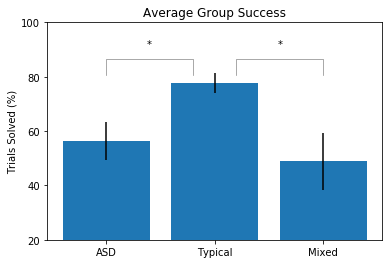

F_onewayResult(statistic=5.1304191658594362, pvalue=0.014376011585685996)
---------------------------


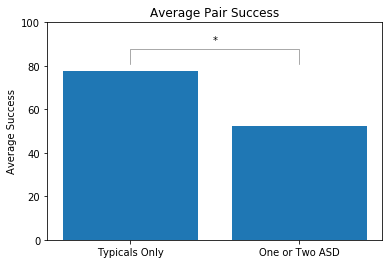

F_onewayResult(statistic=9.9586369804493149, pvalue=0.0042742951824877489)


In [7]:
# To plot pair wise success by group
success_ASD = df_group1['Pair_overall_success']
success_Control = df_group2['Pair_overall_success']
success_Mixed = df_group3['Pair_overall_success']

errors = [stats.sem(success_ASD), stats.sem(success_Control), stats.sem(success_Mixed)]

plt.bar(np.arange(1, 4),[success_ASD.mean(), success_Control.mean(), success_Mixed.mean()], yerr=errors)
plt.xticks([1, 2, 3],['ASD', 'Typical', 'Mixed'])
plt.yticks(np.arange(20, 120, 20))
plt.ylim(20, 100)
y_max = 80
y_min = 75

plt.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(1.8, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
plt.annotate("", xy=(2.2, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
plt.text(1.4, y_max + 12, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.text(2.6, y_max + 12, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.title('Average Group Success')
plt.ylabel('Trials Solved (%)')
# plt.xlabel('Group')
# plt.savefig('Figures/Figure1.jpg')
plt.savefig('FiguresPDF/Group_Success.pdf')
plt.show()


print(stats.f_oneway(success_ASD, success_Control, success_Mixed))
print("---------------------------")

ASD_presence_pairs = pd.concat((pd.DataFrame(success_ASD),pd.DataFrame(success_Mixed)))['Pair_overall_success']

plt.bar(np.arange(0, 2),[success_Control.mean(), ASD_presence_pairs.mean()])

y_max = 80
plt.ylim(0,100)
plt.annotate("", xy=(0, y_max), xycoords='data',
           xytext=(1, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.1"))
plt.text(0.5, y_max + 12, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.xticks([0, 1], ['Typicals Only', 'One or Two ASD'])
plt.title('Average Pair Success')
plt.ylabel('Average Success')
# plt.xlabel('ASD Presence')
# plt.savefig('Figures/Figure2.jpg')
# plt.savefig('FiguresPDF/ASD_Presence_Success.pdf')
plt.show()


print(stats.f_oneway(success_Control,  ASD_presence_pairs))


In [8]:
# reads files to get success, planning time, motion time/trial. Assigns success to each subject.

# f = open('single_subj_summary.csv', 'w')
# writer = csv.writer(f)
# writer.writerow(['ASD_Presence', 'IQ', 'AQ', 'Emphasis', 'N_Moves', 
#                  'Planning_Time', 'Motion_Time', 'Motion_Std_Deviation', 'Time_at_Target', 'Time_at_NonTarget',
#                 'Alignment', 'Success'])
    

for pair in PAIRS:
    d = pd.read_csv('pairwise_data/'+ pair.name +'.csv', header=None)
    
    A = [] #success
    A_std_deviations = [] #motion std deviations
    A_planning_std_deviations = []
    A_NMoves = []
    A_time_target = []
    A_time_nontarget = []
    A_motion_time = []
    
    B = [] #success
    B_std_deviations = []
    B_planning_std_deviations = []
    B_NMoves = []
    B_time_target = []
    B_time_nontarget = []
    B_motion_time = []
    
    a = True
    for t in range(len(d[13])-1):
        if a:
            A.append(d.loc[t,13])
            A_std_deviations.append(d.loc[t,10])
            A_planning_std_deviations.append(d.loc[t,1])
            A_NMoves.append(d.loc[t, 5])
            A_time_target.append(d.loc[t, 7])
            A_time_nontarget.append(d.loc[t, 8])
            A_motion_time.append(d.loc[t, 3])
        else:
            B.append(d.loc[t, 13])
            B_std_deviations.append(d.loc[t, 11])
            B_planning_std_deviations.append(d.loc[t,2])
            B_NMoves.append(d.loc[t, 6])
            B_time_target.append(d.loc[t, 7])
            B_time_nontarget.append(d.loc[t, 8])
            B_motion_time.append(d.loc[t, 4])
        a = not a
    
    
    subA = pair.subjA
    subA.pair_name = pair.name
    subA.average_std_deviation_motion_time = round(np.nanmean(A_std_deviations),4)
    subA.average_planning_time = round(np.nanmean(A_planning_std_deviations),4)
    subA.success = round(np.array(A).mean(),4)
    subA.average_number_moves = round(np.nanmean(A_NMoves),4)
    subA.average_motion_time = round(np.nanmean(A_NMoves),4)
    average_time_target = round(np.nanmean(A_time_target),4)
    average_time_nontarget = round(np.nanmean(A_time_nontarget),4)
    subA.emphasis = round((average_time_target - average_time_nontarget)/average_time_nontarget,4)
    subA.IQ = df.loc[pair.name,'S1IQ']
    subA.ADOS = df.loc[pair.name, 'S1ADOS_score']
    subA.AQ = df.loc[pair.name, 'S1AQ']
    

    
#     writer.writerow([subA.ASD, subA.IQ, subA.AQ, subA.emphasis, subA.average_number_moves, subA.average_planning_time, subA.average_motion_time,
#                     subA.average_std_deviation_motion_time, average_time_target, average_time_nontarget, round(subA.alignment,4),
#                     subA.success])
    
    
    subB = pair.subjB
    subB.pair_name = pair.name
    subB.average_std_deviation_motion_time = round(np.nanmean(B_std_deviations),4)
    subB.average_planning_time = round(np.nanmean(B_planning_std_deviations),4)
    subB.success = round(np.array(B).mean(),4)
    subB.average_number_moves = round(np.nanmean(B_NMoves),4)
    subB.average_motion_time = round(np.nanmean(B_NMoves),4)
    average_time_target = round(np.nanmean(B_time_target),4)
    average_time_nontarget = round(np.nanmean(B_time_nontarget),4)
    subB.emphasis = round((average_time_target - average_time_nontarget)/average_time_nontarget, 4)
    subB.IQ = df.loc[pair.name,'S2IQ']
    subB.ADOS = df.loc[pair.name, 'S2ADOS_score']
    subB.AQ = df.loc[pair.name, 'S2AQ']

    
    
#     writer.writerow([subB.ASD, subB.IQ, subB.AQ, subB.emphasis, subB.average_number_moves, subB.average_planning_time, subB.average_motion_time,
#                 subB.average_std_deviation_motion_time, average_time_target, average_time_nontarget, round(subB.alignment,4),
#                 subB.success])
    print (pair.name, pair.subjA.ASD, pair.subjB.ASD)
# --------
# f.close()


('V', 0, 0)
('H', 0, 0)
('O', 0, 1)
('M', 0, 1)
('R', 0, 0)
('U', 0, 0)
('S', 0, 0)
('W', 0, 0)
('A', 1, 1)
('B', 1, 1)
('F', 1, 1)
('Y', 0, 0)
('K', 1, 0)
('I', 0, 1)
('L', 1, 1)
('N', 0, 1)
('Z', 0, 0)
('E', 1, 1)
('T', 0, 0)
('P', 0, 1)
('D', 1, 1)
('C', 1, 1)
('X', 0, 0)
('J', 1, 0)
('Q', 1, 0)
('G', 0, 0)


22
['5' '9' '9' '6' '10' '10' '9' '7' '8' '10' '1' '7' '11' '9' '6' '8' '2'
 '11' '8' '11' '9' '4']
['O', 'M', 'A', 'A', 'B', 'B', 'F', 'F', 'K', 'I', 'L', 'L', 'N', 'E', 'E', 'P', 'D', 'D', 'C', 'C', 'J', 'Q']


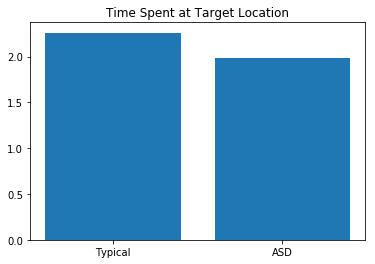

F_onewayResult(statistic=0.65025894239075932, pvalue=0.42383909058229041)


In [9]:
ASD_emphasis = np.array([s.emphasis for s in ASD_SUBJECTS])
Typical_emphasis = np.array([s.emphasis for s in CONTROL_SUBJECTS])
ASD_ADOS = np.array([s.ADOS for s in ASD_SUBJECTS])
ASD_alignment = np.array([s.alignment for s in ASD_SUBJECTS])

print(len(ASD_SUBJECTS))

print(ASD_ADOS)
print([s.pair_name for s in ASD_SUBJECTS])

plt.bar(np.arange(0,2), [Typical_emphasis.mean(), ASD_emphasis.mean()])
plt.title('Time Spent at Target Location')
plt.xticks([0, 1], ['Typical', 'ASD'])
plt.show()

print(stats.f_oneway(ASD_emphasis, Typical_emphasis))



<b> Theory 2 </b> Alignment issues: Predicts that ASD pairs and individuals will have lower alignment scores. Here, alignment is shown in three types. 

F_onewayResult(statistic=3.1038537715802401, pvalue=0.064069184099483908)


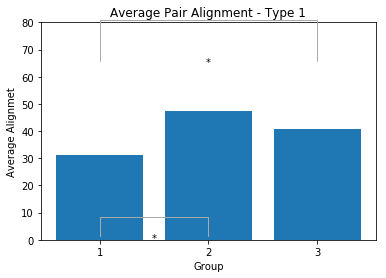

In [47]:
average_per_group = []
averages = []
for group in GROUPS:
    average_alignments = []
    for pair in group:
        average_alignments.append(pair.exact_similarity)
    average_per_group.append((np.array(average_alignments).mean()) * 100)
    averages.append(average_alignments)
    
print(stats.f_oneway(averages[0], averages[1], averages[2]))
# plt.bar(np.arange(1,4), average_per_group)
# y_max = 65
# plt.annotate("", xy=(1, y_max), xycoords='data',
#            xytext=(3, y_max), textcoords='data',
#            arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
#                            connectionstyle="bar,fraction=0.2"))
# plt.text(2, y_max + 0.25, '*',
#        horizontalalignment='center',
#        verticalalignment='center')


# plt.annotate("", xy=(1, 0.5), xycoords='data',
#            xytext=(2, 0.5), textcoords='data',
#            arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
#                            connectionstyle="bar,fraction=0.2"))
# plt.text(1.5, 0.65, '*',
#        horizontalalignment='center',
#        verticalalignment='center')

# plt.ylim(0, 80)
# plt.xticks([1, 2, 3])
# plt.title('Average Pair Alignment - Type 1')
# plt.ylabel('Average Alignmet')
# plt.xlabel('Group')
# # plt.savefig('Figures/Figure3.jpg')
# plt.show()


    

F_onewayResult(statistic=3.620134788410045, pvalue=0.04296700110447664)


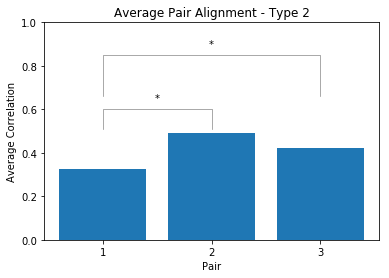

In [53]:
# Correlations with offset of 1
correlations_average = [] #will hold 3 values - 1 average per group
averages = [] #List of lists. One sublist/group, and has the averages of each pair in that group. 
errors = [] #SEM for each group. Length of 3
for group in GROUPS:
    total = 0.0
    avg = []
    for pair in group:
        val = (sum(pair.alignment_bool_array) + sum(pair.off_by_one_list))
        total += val/79.0
        avg.append(val/79.0)
    
    SE = stats.sem(avg)
    averages.append(avg)
    
    correlations_average.append(total/len(group))
    errors.append(SE)

print(stats.f_oneway(averages[0], averages[1], averages[2]))

plt.bar(np.arange(1,4), correlations_average)
y_max = 0.65
plt.annotate("", xy=(1, y_max), xycoords='data',
           xytext=(3, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
plt.text(2, y_max + 0.25, '*',
       horizontalalignment='center',
       verticalalignment='center')


plt.annotate("", xy=(1, 0.5), xycoords='data',
           xytext=(2, 0.5), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.2"))
plt.text(1.5, 0.65, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.title('Average Pair Alignment - Type 2')
plt.ylim((0, 1))
plt.xticks([1, 2, 3])
plt.ylabel("Average Correlation")
plt.xlabel("Pair")
# plt.savefig('Figures/Figure4.jpg')

plt.show()

F_onewayResult(statistic=2.9260964375883556, pvalue=0.073758759918673977)
[47.5, 63.40909090909091, 56.09375]


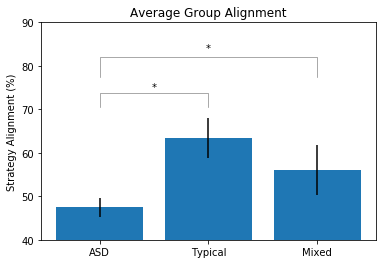

In [195]:
#compares each trial to the one before it and the one after it
averages_of_groups = [] #length of three
group_type = []
errors = [] #length of three
averages_pairs_across_groups = [] #2d array of averages of pairs for each group
success = [] #average success of each group
all_averages = []
group_type = []


for group in GROUPS:
    averages_of_pairs = [] #length of group, one per each group
    for pair in group:
        success.append(pair.success)
        group_type.append(pair.type)
        bool_ar = []
        for trial in range(80):
            before = 0
            after = 0            
            if trial == 0:
                after = pair.strategies[trial+1]
            elif trial == 79:
                before = pair.strategies[trial-1]
            else:
                before = pair.strategies[trial-1]
                after = pair.strategies[trial+1]

            if pair.strategies[trial] == before or pair.strategies[trial] == after:
                bool_ar.append(1)
            else:
                bool_ar.append(0)
        total = sum(bool_ar)
        avg = (total/80.0) * 100 #average for this pair
        averages_of_pairs.append(avg)
        all_averages.append(avg)
    
    averages_pairs_across_groups.append(averages_of_pairs)
    averages_of_groups.append(sum(averages_of_pairs)/len(group)) #average for this group
    errors.append(stats.sem(averages_of_pairs)) #error of this group

print(stats.f_oneway(averages_pairs_across_groups[0], averages_pairs_across_groups[1], averages_pairs_across_groups[2]))
print(averages_of_groups)
plt.bar(np.arange(1, 4), averages_of_groups, yerr=errors)
y_max = 75
plt.annotate("", xy=(1, 77), xycoords='data',
           xytext=(3, 77), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.1"))
plt.text(2, 84, '*',
       horizontalalignment='center',
       verticalalignment='center')


plt.annotate("", xy=(1, 70), xycoords='data',
           xytext=(2, 70), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.15"))
plt.text(1.5, 75, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.title('Average Group Alignment')
plt.ylim((40, 90))
plt.xticks([1, 2, 3], ['ASD', 'Typical', 'Mixed'])
plt.ylabel("Strategy Alignment (%)")
# plt.xlabel("Pair")   
# plt.savefig('Figures/Figure5.jpg')
plt.savefig('FiguresPDF/Group_Alignment.pdf')
plt.show()

averages_pairs_across_groups.append(success)
transpose = map(None, all_averages, group_type, success)

# transpose = np.array(averages_pairs_across_groups).transpose()

# print(transpose)
# f = open('delay_1.csv', 'w')
# writer = csv.writer(f)
# writer.writerow(['Average', 'Group', 'Success'])
# for p in transpose:
#     writer.writerow(p)
    
# f.close()
# print('after final file')
                

In [ ]:
#calculates OR alignment with multiple delays

averages = []
for group in GROUPS:
    
    delay_averages = []
    group_delay_corr = [] 
    
    for pair in group:
        
        delay_corr = [] # five averages - one per each delay
        for delay in [1, 3, 5, 7, 9, 11, 13, 15]:
            bool_ar = []
            
            for trial in range(80):
                before = 0
                after = 0
                if trial < delay:
                    after = pair.strategies[trial+delay]
                elif trial >= (80-delay):
                    before = pair.strategies[trial-delay]
                else:
                    before = pair.strategies[trial-delay]
                    after = pair.strategies[trial+delay]

                if pair.strategies[trial] == before or pair.strategies[trial] == after:
                    bool_ar.append(1)
                else:
                    bool_ar.append(0)
                
            avg = sum(bool_ar)/80.0
            delay_corr.append(avg)     
        group_delay_corr.append(delay_corr)
        corrs_by_delay = (np.array(group_delay_corr).T)
    for row in corrs_by_delay:
        delay_averages.append(sum(row)/float(len(row)))
    averages.append(delay_averages) 
print(np.array(averages))

width = 0.25
ind = np.arange(8)
fig, ax = plt.subplots()
rects1 = ax.bar(ind, averages[0], width, color='r')
rects2 = ax.bar(ind + width, averages[1], width, color='b')
rects3 = ax.bar(ind + 2*width, averages[2], width, color='g')
ax.set_xticks(ind + width)
ax.set_xticklabels(('1', '3', '5', '7', '9', '11', '13', '15'))
ax.set_title('Alignments with Delay')
ax.set_ylabel('Alignment')
ax.set_xlabel('Delay')
plt.show()

In [8]:
def arcsine_transform(ar):
    return np.around(np.arcsin(np.sqrt(ar)), 4)

def logit_transform(ar):
    for x in ar:
        x = x/(1-x)
    return np.around(np.log(ar), 4)


# df = pd.read_csv('TCG_data.csv',index_col=0)
# df_group1 = df['A':'L']
# df_group2 = df['G':'Z']
# df_group3 = df['I':'Q']


[0.375, 0.3, 0.2, 0.3, 0.325, 0.35, 0.325, 0.3, 0.575, 0.525, 0.75, 0.275, 0.175, 0.625, 0.475, 0.5, 0.525, 0.5, 0.575, 0.275, 0.55, 0.225, 0.25, 0.5, 0.425, 0.45]
[ 0.6591  0.5796  0.4636  0.5796  0.6066  0.6331  0.6066  0.5796  0.8607
  0.8104  1.0472  0.552   0.4316  0.9117  0.7604  0.7854  0.8104  0.7854
  0.8607  0.552   0.8355  0.4942  0.5236  0.7854  0.7101  0.7353]
[-0.9808 -1.204  -1.6094 -1.204  -1.1239 -1.0498 -1.1239 -1.204  -0.5534
 -0.6444 -0.2877 -1.291  -1.743  -0.47   -0.7444 -0.6931 -0.6444 -0.6931
 -0.5534 -1.291  -0.5978 -1.4917 -1.3863 -0.6931 -0.8557 -0.7985]


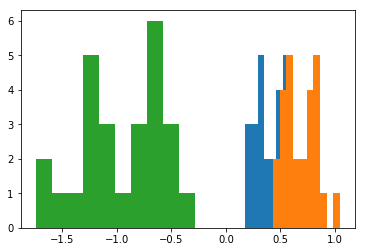

____
after final file


In [9]:
#compares each trial to the one before it and the one after it. Removes INF trials
averages_of_groups = [] #length of three
ASD_presence = []
errors = [] #length of three
averages_pairs_across_groups = [] #2d array of averages of pairs for each group
success = [] #average success of each group
all_averages = []
group_type = []
Align_0_1 = []
Align_1_2 = []
Pair_name = []


for group in GROUPS:
    averages_of_pairs = [] #length of group, one per each group
    for pair in group:
        success.append(pair.success/100.0)
        Pair_name.append(pair.name)
        group_type.append(pair.type)
        
        if pair.type == 2:
            ASD_presence.append(0)
        else:
            ASD_presence.append(1)
        
        Align_0_1.append(pair.exact_similarity)
        Align_1_2.append(pair.off_by_one_similarity)
            
        strats = np.array(pair.strategies)
        
        strats = strats.tolist()
        while 'inf' in strats:
            strats.remove('inf')
        
        length = len(strats)
        
        bool_ar = []
        for trial in range(length):
            before = 0
            after = 0
            if trial == 0:
                after = strats[trial+1]
            elif trial == (length-1):
                before = strats[trial-1]
            else:
                before = strats[trial-1]
                after = strats[trial+1]

            if strats[trial] == before or strats[trial] == after:
                bool_ar.append(1)
            else:
                bool_ar.append(0)
        total = sum(bool_ar)
        avg = total/float(length) #average for this pair
        averages_of_pairs.append(avg)
        all_averages.append(avg)
    
    averages_pairs_across_groups.append(averages_of_pairs)
    averages_of_groups.append(sum(averages_of_pairs)/len(group)) #average for this group
    errors.append(stats.sem(averages_of_pairs)) #error of this group

# plt.bar(np.arange(len(GROUPS)), averages_of_groups, yerr=errors)
# plt.ylim((0, 1))
# plt.ylabel("Average Correlation")
# plt.xlabel("Group")   

# plt.show()

pair_mean_IQs = np.around([df.get_value(p, 'mean_IQ') for p in Pair_name], 4)
pair_min_IQs = np.around([df.get_value(p, 'Pair_minimumIQ') for p in Pair_name], 4)

print(Align_0_1)
print(arcsine_transform(Align_0_1))
print(logit_transform(Align_0_1))

plt.hist(Align_0_1)
plt.hist(arcsine_transform(Align_0_1))
plt.hist(logit_transform(Align_0_1))
plt.show()

print ('____')
transpose = map(None,Pair_name, np.around(Align_0_1, 4), np.around(arcsine_transform(Align_0_1), 4), np.around(logit_transform(Align_0_1), 4),
                np.around(Align_1_2, 4), np.around(arcsine_transform(Align_1_2), 4), np.around(logit_transform(Align_1_2), 4),
                np.around(all_averages, 4), np.around(arcsine_transform(all_averages),4), np.around(logit_transform(all_averages),4),
                group_type, ASD_presence, success, np.around(arcsine_transform(success), 4), np.around(logit_transform(success), 4),
               pair_mean_IQs, pair_min_IQs)

# print(np.array(transpose))
# f = open('alignment_summary.csv', 'w')
# writer = csv.writer(f)
# writer.writerow(["Pair_name", 'Align_0_1', 'Align_0_1_ASine', 'Align_0_1_Logit', 'Align_1_2', 'Align_1_2_ASine', 'Align_1_2_Logit', 
#                  'Align_OR', 'Align_OR_ASine', 'Align_OR_Logit','Group', 'ASD_Presence', 'Success', 'Success_ASine', 'Success_Logit', 'Mean_IQ', 'Min_IQ'])
# for p in np.array(transpose):
#     writer.writerow(p)
    
# f.close()
print('after final file')
                

(47.20940170940171, 35.897435897435905)


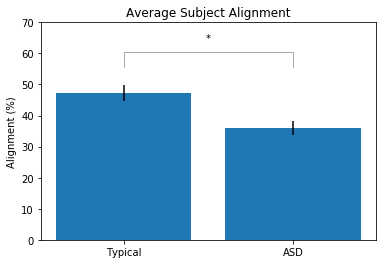

F_onewayResult(statistic=9.5471766572082029, pvalue=0.0032676823879716943)


In [196]:
ASD_alignments = [s.alignment * 100 for s in ASD_SUBJECTS]
Control_alignments = [s.alignment * 100 for s in CONTROL_SUBJECTS]

# final_data_ar = [['ASD_presence', 'Alignment', 'IQ']]

# for pair in PAIRS:
#     final_data_ar.append([pair.subjA.ASD, pair.subjA.alignment, pair.subjA.IQ])
#     final_data_ar.append([pair.subjB.ASD, pair.subjB.alignment, pair.subjB.IQ])

# f = open('single_subj_summary.csv', 'w')
# writer = csv.writer(f)
# for p in np.array(final_data_ar):
#     writer.writerow(p)
    
# f.close()

errors = [ stats.sem(Control_alignments), stats.sem(ASD_alignments)]
print(np.array(Control_alignments).mean(), np.array(ASD_alignments).mean() )

plt.bar(np.arange(0, 2),[np.array(Control_alignments).mean(), np.array(ASD_alignments).mean()], yerr=errors)
y_max = 55
plt.ylim(0, 70)
plt.annotate("", xy=(0, y_max), xycoords='data',
           xytext=(1, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.1"))

plt.text(0.5, y_max + 10, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.xticks([0, 1], ['Typical', 'ASD'])
plt.title('Average Subject Alignment')
plt.ylabel('Alignment (%)')
# plt.xlabel('ASD Presence')
plt.savefig('Figures/Single_Subject_Alignment.jpg')
plt.savefig('FiguresPDF/Single_Subject_Alignment.pdf')
plt.show()
print(stats.f_oneway(ASD_alignments, Control_alignments))



In [ ]:
ASD_emphasis = np.array([s.emphasis for s in ASD_SUBJECTS])
Typical_emphasis = np.array([s.emphasis for s in CONTROL_SUBJECTS])

ASD_ADOS = np.array([s.ADOS for s in ASD_SUBJECTS])
ASD_alignment = np.array([s.alignment for s in ASD_SUBJECTS])

print(ASD_ADOS)
# print(stats.linregress(ASD_ADOS, ASD_alignment))

plt.bar(np.arange(0,2), [Typical_emphasis.mean(), ASD_emphasis.mean()])
plt.xticks([0, 1])
plt.show()

# print(stats.f_oneway(ASD_emphasis, Typical_emphasis))
print(ASD_emphasis.mean(), Typical_emphasis.mean())


    


In [ ]:
#trying to find intervals of consistent strategy use. 
sum_ar = np.zeros(40,)

for pair in GROUP_2:
    sum_ar = sum_ar + np.array(pair.alignment_bool_array)
    
plt.plot(sum_ar)
plt.show()



F_onewayResult(statistic=2.7093072673183167, pvalue=0.10603674336178942)


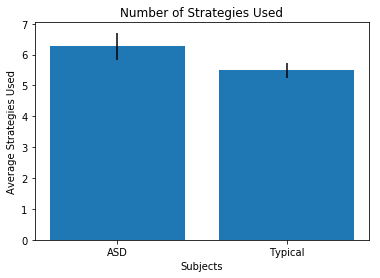

16
17
11


In [125]:
f = open('single_strat_dist.csv', 'w')
writer = csv.writer(f)
writer.writerow(['ASD', 'Strats_Used'])

ASD_set = []
for s in ASD_SUBJECTS:
    strat_dict = s.strategy_dictionary
    tot_strats = 0
    for k in strat_dict.keys():
        if strat_dict[k]:
            tot_strats +=1
    ASD_set.append(tot_strats)    
    writer.writerow([1, tot_strats])
# ASD_set = set(ASD_set)


Typical_set = []
for s in CONTROL_SUBJECTS:
    strat_dict = s.strategy_dictionary
    tot_strats = 0
    for k in strat_dict.keys():
        if strat_dict[k]:
            tot_strats +=1
    Typical_set.append(tot_strats)
    writer.writerow([0, tot_strats])
# Typical_set = set(Typical_set)

f.close()
print(stats.f_oneway(ASD_set, Typical_set))
errors = [stats.sem(ASD_set), stats.sem(Typical_set)]

plt.bar(np.arange(2), [np.array(ASD_set).mean(), np.array(Typical_set).mean()], yerr=errors)
plt.title('Number of Strategies Used')
plt.ylabel('Average Strategies Used')
plt.xlabel('Subjects')
plt.xticks([0, 1], ['ASD', 'Typical'])
plt.savefig('Figures/Subject_Strat_Distribution.jpg')
plt.savefig('FiguresPDF/Subject_Strat_Distribution.pdf')
plt.show()

ASD_Strats = []
Typical_Strats = []
Mixed_Strats = []
for p in GROUP_1:
    ASD_Strats.extend(p.strategies)
ASD_Strats = set(ASD_Strats)
print(len(ASD_Strats))
# asd_avg = len(ASD_Strats)/float(len(GROUP_1))

for p in GROUP_2:
    Typical_Strats.extend(p.strategies)
Typical_Strats = set(Typical_Strats)
print(len(Typical_Strats))
# typical_avg = len(Typical_Strats)/float(len(GROUP_2))

for p in GROUP_3:
    Mixed_Strats.extend(p.strategies)
Mixed_Strats = set(Mixed_Strats)
print(len(Mixed_Strats))
# Mixed_avg = len(Mixed_Strats)/float(len(GROUP_3))

# print([asd_avg, typical_avg, Mixed_avg])
# plt.bar(np.arange(3), [len(ASD_Strats), len(Typical_Strats), len(Mixed_Strats)])
# plt.title('Number of Strategies Used By Group')
# plt.ylabel('Number of Strategies')
# plt.xlabel('Group')
# plt.xticks([0, 1, 2], ['ASD', 'Typical', 'Mixed'])
# # plt.savefig('Figures/Group_Strat_Distribution.jpg')
# # plt.savefig('FiguresPDF/Group_Strat_Distribution.pdf')
# plt.show()


In [100]:
#finds how many time each strategy is used per group
def analysis_by_group(g, group_type):
    group_dict = {}
    average_dictionary = {}
    num_strats_per_pair = []
    
    for pair in g:
        dict_A = pair.subjA.strategy_dictionary
        dict_B = pair.subjB.strategy_dictionary
        
        for k in sorted(dict_A.keys()):
            if k in group_dict:
                group_dict[k] += dict_A[k] + dict_B[k]
            else: 
                group_dict[k] = dict_A[k] + dict_B[k]
            
            num_strats_per_pair.append(len([k for k in dict_A.keys() if dict_A[k]])-1  +  len([k for k in dict_B.keys() if dict_B[k]])-1)
        
    for k in dict_A.keys():
        average_dictionary[k] = float(group_dict[k])/len(g)

    strategies = []
    values = []
    
    for w in sorted(average_dictionary, key=average_dictionary.get, reverse=True):
        strategies.append(float(w))
        values.append(average_dictionary[w]) 
        
#     strategies = sorted([float(i) for i in group_dict.keys()])
#     values = [average_dictionary[str(s)] for s in strategies]
    
#     fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
#     plt.bar(np.arange(len(strategies)), values)
#     plt.xticks(range(len(strategies)), strategies)
#     plt.ylim((0, 41))
#     plt.ylabel("Average Times Used")
#     plt.xlabel("Strategy")
#     plt.title("group " + str(group_type))    
#     plt.savefig("Figures/" + str(group_type) + ".jpg" )
    plt.show()
    
    return np.array(strategies), np.array(values)

[32.222943722943718, 13.402056277056277, 9.5221861471861473, 5.6222943722943723, 4.5330086580086579, 3.5254329004329001, 2.7299783549783547, 2.652056277056277, 1.8614718614718615, 1.2743506493506493, 0.99188311688311692, 0.60173160173160178, 0.47619047619047622, 0.24675324675324672, 0.16883116883116886, 0.13852813852813853, 0.030303030303030304]


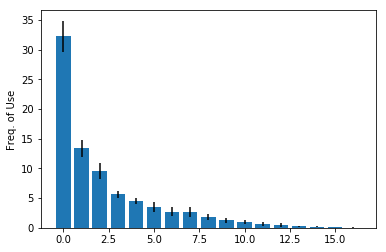

In [117]:
#for every group, count how many times each strategy is used. plot by frequency

strat1, val1 = analysis_by_group(GROUP_1, 1)
strat2, val2 = analysis_by_group(GROUP_2, 2)
strat3, val3 = analysis_by_group(GROUP_3, 3)

all_vals = np.array([np.array(val1), np.array(val2), np.array(val3)])
# print(all_vals.T)

avg_vals = [l.mean() for l in all_vals.T]
avg_err = [stats.sem(l) for l in all_vals.T]
print(avg_vals)
plt.bar(np.arange(17), avg_vals, yerr=avg_err)
plt.ylabel('Freq. of Use')
xticks = ax.xaxis.get_major_ticks()
for n in range(len(xticks)-1):
    xticks[n].label1.set_visible(False) 
    
# plt.savefig('Figures/Sample_strats_dist.jpg')
plt.show()

In [136]:
def analysis_by_subject(g):
    group_dict = {}
    strat_count_dict = {}
    average_dictionary = {}
    
    for s in g:
        dict_s = s.strategy_dictionary
        
        for k in sorted(dict_s.keys()):
            if k in group_dict:
                group_dict[k] += dict_s[k] 
                strat_count_dict[k].append(dict_s[k])
            else: 
                group_dict[k] = dict_s[k]
                strat_count_dict[k] = [dict_s[k]]
                                                
    
    for k in strat_count_dict.keys():
        strat_count_dict[k] = stats.sem(strat_count_dict[k])
    for k in (dict_s.keys()):
        average_dictionary[k] = float(group_dict[k])/len(g)

    strategies = []
    values = []
    errors = []
    
    for w in sorted(average_dictionary, key=average_dictionary.get, reverse=True):
        strategies.append(float(w))
        values.append(average_dictionary[w])
        errors.append(strat_count_dict[w])
        
    return np.array(strategies), np.array(values), np.array(errors)

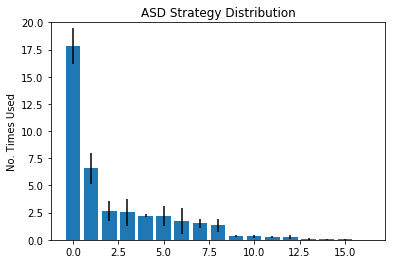

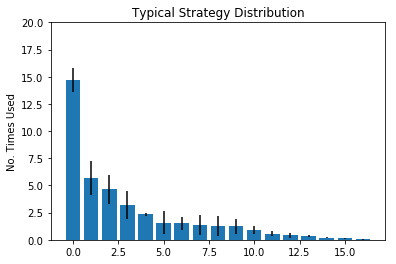

In [140]:
ASD_strats, ASD_vals, ASD_error = analysis_by_subject(ASD_SUBJECTS)
Typical_strats, Typical_vals, Typical_error = analysis_by_subject(CONTROL_SUBJECTS)


plt.bar(np.arange(17), ASD_vals, yerr=ASD_error)
plt.title('ASD Strategy Distribution')
plt.ylim(0,20)
plt.ylabel('No. Times Used')
plt.savefig('Figures/ASD_strat_distribution.jpg')
plt.savefig('FiguresPDF/ASD_strat_distribution.pdf')
plt.show()

plt.bar(np.arange(17), Typical_vals, yerr=Typical_error)
plt.ylim(0,20)
plt.ylabel('No. Times Used')
plt.title('Typical Strategy Distribution')
plt.savefig('Figures/Typical_strat_distribution.jpg')
plt.savefig('FiguresPDF/Typical_strat_distribution.pdf')
plt.show()






# all_vals = np.array([ASD_vals, Typical_vals])
# # print(all_vals.T)

# avg_vals = [l.mean() for l in all_vals.T]
# avg_err = [stats.sem(l) for l in all_vals.T]
# print(avg_vals)
# plt.bar(np.arange(17), avg_vals, yerr=avg_err)
# plt.ylabel('Freq. of Use')
# xticks = ax.xaxis.get_major_ticks()
# for n in range(len(xticks)-1):
#     xticks[n].label1.set_visible(False) 
# plt.show()
    

In [118]:
# takes out trials where a new problem type is introduced and the alignment score in the TYPICAL pairs falls under the median

for pair in PAIRS:
    alignment_array = [0]
    for s in range(1, len(pair.strategies)):
        if pair.strategies[s] == pair.strategies[s-1]:
            alignment_array.append(1)
        else:
            alignment_array.append(0)
    pair.aligned_to_prev_array = alignment_array


def throw_trials():
    total_ar = np.zeros(80)
    for pair in GROUP_2:
        pair_ar = np.array(pair.aligned_to_prev_array)
        total_ar = np.add(total_ar, pair_ar)

    med = np.median(total_ar)

    total_trials_thrown = 0
    trials_to_throw = []
    for t in range(1, len(TRIAL_DIFFICULTY)):
        if TRIAL_DIFFICULTY[t] != TRIAL_DIFFICULTY[t-1] and total_ar[t] < med:
            total_trials_thrown +=1
            trials_to_throw.append(t)
    return trials_to_throw
        
# print(total_trials_thrown)
# print(trials_to_throw)
# print([TRIAL_DIFFICULTY[d] for d in trials_to_throw])



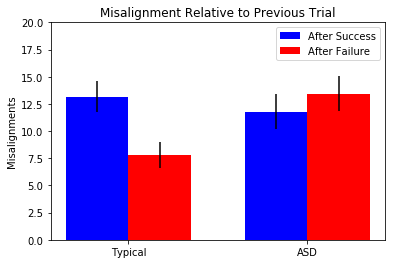

F_onewayResult(statistic=8.3840562458908217, pvalue=0.005599500084058919)
F_onewayResult(statistic=0.41295636948119718, pvalue=0.52340871796578115)


In [120]:
# finds misalignment score for individuals in mixed pairs to see if they are struggling with understanding or replicating strategies

# TRIALS_TO_THROW = throw_trials()

for pair in PAIRS:
    alignment_array = pair.aligned_to_prev_array 
    mis_A_after_success = 0
    mis_A_after_failure = 0
    mis_B_after_success = 0
    mis_B_after_failure = 0
    trial_success_list = []
    
    d = pd.read_csv('pairwise_data/'+ pair.name +'.csv', header=None)
    
    for t in range(len(alignment_array)-1):
        trial_success_list.append(d.loc[t,13])
    
    pair.success_array = trial_success_list
    
    total_mis_A = 0
    total_mis_B = 0
    for t in range(1, len(alignment_array)):
#         if t in TRIALS_TO_THROW:
#             continue
        prev = alignment_array[t-1]
        curr = alignment_array[t]
        if curr < prev or (curr == 0 and prev == 0) and t%2 == 0:
            total_mis_A += 1
            if trial_success_list[t-1] == 1:
                mis_A_after_success += 1
            else:
                mis_A_after_failure += 1
        elif curr < prev or (curr == 0 and prev == 0) and t%2 == 1:
            total_mis_B += 1
            if trial_success_list[t-1] == 1:
                mis_B_after_success += 1
            else:
                mis_B_after_failure += 1
                
                
    pair.subjA.misalignment_after_success = mis_A_after_success
    pair.subjB.misalignment_after_success = mis_B_after_success
    
    pair.subjA.misalignment_after_failure = mis_A_after_failure
    pair.subjB.misalignment_after_failure = mis_B_after_failure

f = open('misalignment_relative_to_prev_trial.csv', 'w')
writer = csv.writer(f)
writer.writerow(['ASD_Presence', 'Mis_After_Fail', 'Mis_After_sucess', 'IQ'])
ASD_after_failure = []
ASD_after_success = []
for s in ASD_SUBJECTS:
    fail = s.misalignment_after_failure
    success = s.misalignment_after_success
    writer.writerow([1, fail, success, s.IQ])
    ASD_after_failure.append(s.misalignment_after_failure)
    ASD_after_success.append(s.misalignment_after_success)

average_ASD_mis_after_failure = np.array(ASD_after_failure).mean()
average_ASD_mis_after_success = np.array(ASD_after_success).mean()


Typical_after_failure = []
Typical_after_success = []
for s in CONTROL_SUBJECTS:
    Typical_after_failure.append(s.misalignment_after_failure)
    Typical_after_success.append(s.misalignment_after_success)
    fail = s.misalignment_after_failure
    success = s.misalignment_after_success
    writer.writerow([0, fail, success, s.IQ])

f.close()

average_Typical_mis_after_failure = np.array(Typical_after_failure).mean()
average_Typical_mis_after_success = np.array(Typical_after_success).mean()



N = 2
success_sem = (stats.sem(Typical_after_success), stats.sem(ASD_after_success))

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, [average_Typical_mis_after_success, average_ASD_mis_after_success], width, color='b',yerr=success_sem)

failure_sem = (stats.sem(Typical_after_failure), stats.sem(ASD_after_failure))
rects2 = ax.bar(ind + width, [average_Typical_mis_after_failure, average_ASD_mis_after_failure], width, color='r',yerr=failure_sem)

# add some text for labels, title and axes ticks
plt.ylim((0, 20))
ax.set_ylabel('Misalignments')
ax.set_title('Misalignment Relative to Previous Trial')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Typical', 'ASD'))

ax.legend((rects1[0], rects2[0]), ('After Success', 'After Failure'))

plt.savefig('Figures/Both_types_of_misalignment.jpg')
plt.show()


print(stats.f_oneway(Typical_after_failure, ASD_after_failure))
print(stats.f_oneway(Typical_after_success, ASD_after_success))

            

(9, 13)


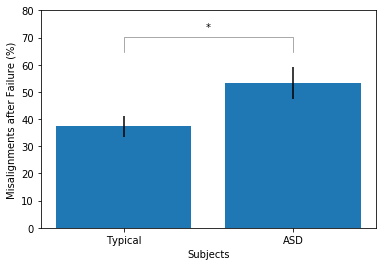

F_onewayResult(statistic=5.503862603964591, pvalue=0.022980433741561539)


In [123]:
after_failure = 0
ASD_mis_after_fail = []
after_success = 0
f = open('misalignment_in_ASD.csv', 'w')
writer = csv.writer(f)
writer.writerow(['ASD_presence', 'Misalign_after_failure', 'Mis_after_fail_rate', 'Misalign_after_success', 'IQ'])

for s in ASD_SUBJECTS:
    m_after_fail_rate = (100 * s.misalignment_after_failure)/float(s.misalignment_after_success + s.misalignment_after_failure)
    ASD_mis_after_fail.append(m_after_fail_rate)

    writer.writerow([1, s.misalignment_after_failure, round(m_after_fail_rate,4), s.misalignment_after_success, s.IQ])
    if s.misalignment_after_success > s.misalignment_after_failure:
        after_success +=1
    else:
        after_failure +=1
print(after_success, after_failure)

Typical_mis_after_fail = []   
Typical_after_success = 0
Typical_after_failure = 0
for s in CONTROL_SUBJECTS:
    m_after_fail_rate = (100 * s.misalignment_after_failure)/float(s.misalignment_after_success + s.misalignment_after_failure)
    Typical_mis_after_fail.append(m_after_fail_rate)

    writer.writerow([0, s.misalignment_after_failure, round(m_after_fail_rate,4), s.misalignment_after_success, s.IQ])
    
    if s.misalignment_after_success > s.misalignment_after_failure:
        Typical_after_success +=1
    else:
        Typical_after_failure +=1
f.close()


# plt.bar(np.arange(0,2), [after_success/float(len(ASD_SUBJECTS)), after_failure/float(len(ASD_SUBJECTS))])
# plt.xticks(range(2), ['After Success', 'After Failure'])
# plt.title('Misalignment in ASD Subjects')
# plt.ylim(0, 1)
# plt.show()
# # plt.savefig('Figures/ASD_misalign.jpg')


# plt.bar(np.arange(0,2), [Typical_after_success/float(len(CONTROL_SUBJECTS)), Typical_after_failure/float(len(CONTROL_SUBJECTS))])
# plt.xticks(range(2), ['After Success', 'After Failure'])
# plt.title('Misalignment in Typical Subjects')
# plt.ylim(0,1)
# plt.show()

errors =  [stats.sem(Typical_mis_after_fail), stats.sem(ASD_mis_after_fail)]
plt.bar(np.arange(0,2), [np.array(Typical_mis_after_fail).mean(), np.array(ASD_mis_after_fail).mean()], yerr=errors)
y_max = 64
plt.annotate("", xy=(0, y_max), xycoords='data',
           xytext=(1, y_max), textcoords='data',
           arrowprops=dict(arrowstyle="-", ec='#aaaaaa',
                           connectionstyle="bar,fraction=0.1"))

plt.text(0.5, y_max + 10, '*',
       horizontalalignment='center',
       verticalalignment='center')
plt.xticks(range(2), ['Typical', 'ASD'])
plt.ylabel('Misalignments after Failure (%)')
plt.xlabel('Subjects')
plt.ylim(0,80)
plt.savefig('Figures/Avg_Misalignment_after_Failure.jpg')
plt.savefig('FiguresPDF/Avg_Misalignment_after_Failure.pdf')
plt.show()

print(stats.f_oneway(np.array(ASD_mis_after_fail), np.array(Typical_mis_after_fail)))



# print ASD_mis_after_fail
# plt.title('Distribution of Misalignment after Failure in ASD Subjects')
# plt.ylabel('No. Subjects')
# plt.xlabel('Misalignment after Failure Percentage')
# plt.hist(ASD_mis_after_fail, edgecolor='k')
# # plt.savefig('Figures/Dist_misalignment_ASD.jpg')
# plt.show()

# print Typical_mis_after_fail
# plt.title('Distribution of Misalignment after Failure in Typical Subjects')
# plt.ylabel('No. Subjects')
# plt.xlabel('Misalignment after Failure Percentage')
# plt.hist(Typical_mis_after_fail, edgecolor='k')
# # plt.savefig('Figures/Dist_misalignment_Typical.jpg')
# plt.show()
    
    

26.5
27.9666666667
21.9090909091
19.9090909091


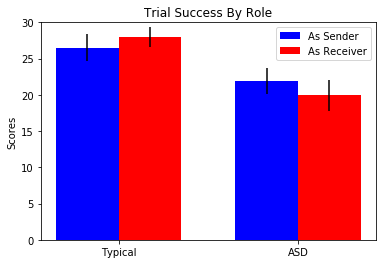

F_onewayResult(statistic=0.50113401045261807, pvalue=0.48291250542218278)


In [75]:
Typical_sender_success = []
Typical_receiver_success = []
ASD_sender_success = []
ASD_receiver_success = []

f = open('trial_success_by_role.csv', 'w')
writer = csv.writer(f)
writer.writerow(['ASD_Presence', 'Sender_success', 'Receiver_sucess', 'IQ'])

for pair in PAIRS:
    subA_s = 0
    subA_r = 0
    subB_s = 0
    subB_r = 0
    
    for t in range(len(pair.success_array)-1):
        if t%2 == 0: #subA
            subA_s += pair.success_array[t]
            subB_r += pair.success_array[t]
        else:
            subB_s += pair.success_array[t]
            subA_r += pair.success_array[t]
    
    if pair.subjA in ASD_SUBJECTS:
        writer.writerow([1, subA_s, subA_r, pair.subjA.IQ])
        ASD_sender_success.append(subA_s)
        ASD_receiver_success.append(subA_r)
    else:
        writer.writerow([0, subA_s, subA_r, pair.subjA.IQ])
        Typical_sender_success.append(subA_s)
        Typical_receiver_success.append(subA_r)
    
    
    if pair.subjB in ASD_SUBJECTS:
        writer.writerow([1, subB_s, subB_r, pair.subjB.IQ])
        ASD_sender_success.append(subB_s)
        ASD_receiver_success.append(subB_r)
    else:
        writer.writerow([0, subB_s, subB_r, pair.subjB.IQ])
        Typical_sender_success.append(subB_s)
        Typical_receiver_success.append(subB_r)       
    
f.close()
                
        
print np.array(Typical_sender_success).mean()
print np.array(Typical_receiver_success).mean()
print np.array(ASD_sender_success).mean()
print np.array(ASD_receiver_success).mean()
        
N = 2
success_sem = (stats.sem(Typical_sender_success), stats.sem(ASD_sender_success))

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, [np.array(Typical_sender_success).mean(), np.array(ASD_sender_success).mean()], width, color='b',yerr=success_sem)

failure_sem = (stats.sem(Typical_receiver_success), stats.sem(ASD_receiver_success))
rects2 = ax.bar(ind + width, [np.array(Typical_receiver_success).mean(), np.array(ASD_receiver_success).mean()], width, color='r',yerr=failure_sem)

# add some text for labels, title and axes ticks
plt.ylim((0, 30))
ax.set_ylabel('Scores')
ax.set_title('Trial Success By Role')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Typical', 'ASD'))

ax.legend((rects1[0], rects2[0]), ('As Sender', 'As Receiver'))
# plt.savefig('Figures/Trial_success_by_role.jpg')
plt.show()
        
print stats.f_oneway(ASD_sender_success, ASD_receiver_success)
        

8.22727272727
10.4545454545
6.83333333333
11.1333333333


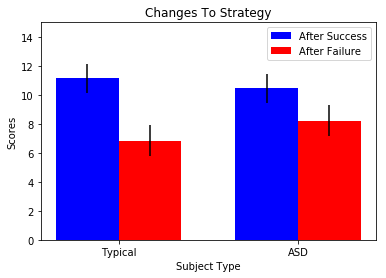

In [76]:
# Plots how many times a player will change strategy (from their previous strategy) following success or failure

for p in PAIRS:
    A_switch_failure = 0
    A_switch_success = 0
    B_switch_failure = 0
    B_switch_success = 0
    for t in range(len(p.success_array)-2):
        if t%2==0 and p.strategies[t] != p.strategies[t+2]: #subA
            if p.success_array[t] == 1:
                A_switch_success += 1
            else:
                A_switch_failure += 1
        
        if t%2==1 and p.strategies[t] != p.strategies[t+2]: #subB
            if p.success_array[t] == 1:
                B_switch_success += 1
            else:
                B_switch_failure += 1
    
    p.subjA.switch_after_success = A_switch_success
    p.subjA.switch_after_failure = A_switch_failure
    p.subjB.switch_after_success = B_switch_success
    p.subjB.switch_after_failure = B_switch_failure

f= open('Changes_to_strategy.csv', 'w')
writer = csv.writer(f)
writer.writerow(['ASD_Presence', 'Change_after_success', 'Change_after_failure', 'IQ'])
ASD_failure = []
ASD_success = []
for s in ASD_SUBJECTS:
    writer.writerow([1, s.switch_after_success, s.switch_after_failure, s.IQ])
    ASD_failure.append(s.switch_after_failure)
    ASD_success.append(s.switch_after_success)
    
Typical_failure = []
Typical_success = []
for s in CONTROL_SUBJECTS:
    writer.writerow([0, s.switch_after_success, s.switch_after_failure, s.IQ])

    Typical_failure.append(s.switch_after_failure)
    Typical_success.append(s.switch_after_success)

f.close()
    
print(np.array(ASD_failure).mean())
print(np.array(ASD_success).mean())
print(np.array(Typical_failure).mean())
print(np.array(Typical_success).mean())
# plt.bar(np.arange(0,2), [np.array(Typical_success).mean(), np.array(ASD_success).mean()])
# plt.show()


N = 2
success_sem = (stats.sem(Typical_success), stats.sem(ASD_success))

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, [np.array(Typical_success).mean(), np.array(ASD_success).mean()], width, color='b',yerr=success_sem)

failure_sem = (stats.sem(Typical_failure), stats.sem(ASD_failure))
rects2 = ax.bar(ind + width, [np.array(Typical_failure).mean(), np.array(ASD_failure).mean()], width, color='r',yerr=failure_sem)

# add some text for labels, title and axes ticks
plt.ylim((0, 15))
ax.set_ylabel('Scores')
ax.set_xlabel('Subject Type')
ax.set_title('Changes To Strategy')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Typical', 'ASD'))

ax.legend((rects1[0], rects2[0]), ('After Success', 'After Failure'))
# plt.savefig('Figures/Changes_to_strat_per_subj.jpg')
plt.show()
        

In [12]:
# Code for multiple bar plot
# x = np.arange(len(strat1))
# fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')

# ax = plt.subplot(111)

# ax.bar(x-0.2, strat1,width=0.2,color='b',align='center', label='Group1')
# ax.bar(x, strat2,width=0.2,color='g',align='center', label='Group2')
# ax.bar(x+0.2, strat3,width=0.2,color='r',align='center', label='Group3')

# plt.xticks(range(len(strat1)), strat1)
# # plt.show()
        

[  0.  11.  11.  11.   1.   6.   2.   4.  10.   1.   0.   0.   5.   1.   0.
   9.   1.   0.   2.   5.   3.   8.   8.   0.   0.   2.   5.   4.   5.   2.
   1.   4.   7.   6.   7.   6.   8.   8.   6.   6.   9.   8.  10.   9.   7.
   1.   2.   2.   2.   2.   9.   1.   7.   8.   8.   8.   8.   2.  10.  10.
   2.   8.   8.   9.   9.   9.  10.  10.  10.   2.   2.   9.   8.   2.   2.
   9.   8.   3.   3.   3.]


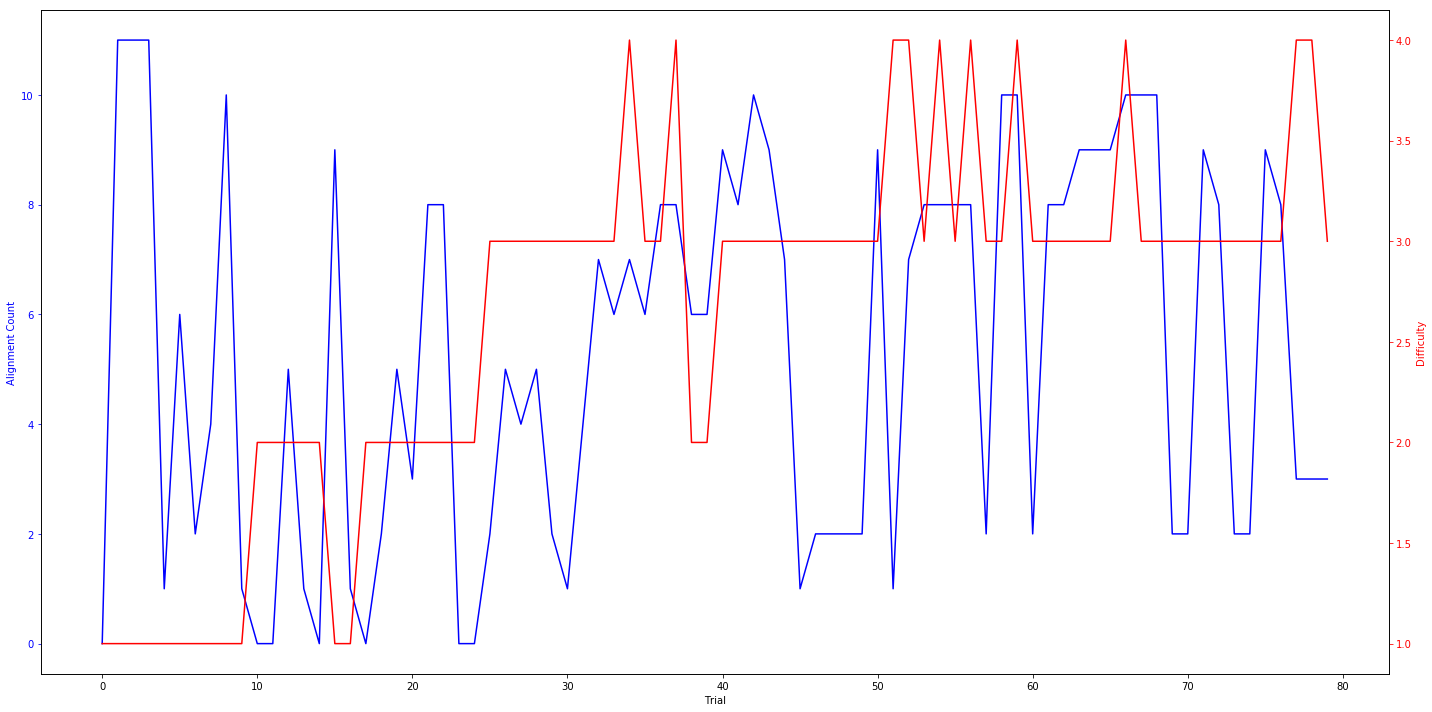

In [49]:
total_ar = np.zeros(80)
for pair in GROUP_2:
    pair_ar = np.array(pair.aligned_to_prev_array)
    total_ar = np.add(total_ar, pair_ar)

print(total_ar)


# plt.figure(figsize=(20,20))
# plt.xlabel('trials')
# plt.subplot(211)
# plt.ylabel('Alignment')
# plt.plot(total_ar)
# plt.subplot(212)
# plt.ylabel('Difficulty')
# plt.plot(TRIAL_DIFFICULTY)
# plt.show()

fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(total_ar, 'b-')
ax1.set_xlabel('Trial')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Alignment Count', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(TRIAL_DIFFICULTY, 'r')
ax2.set_ylabel('Difficulty', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.savefig('Figures/Alignment_vs_difficulty.jpg')
plt.show()
    

Interrater Comparisons

In [215]:
total_exact = 0
total_general = 0
f = open('Interrater_Strats.csv', 'w')
writer = csv.writer(f)
writer.writerow(['Pair', 'Rater_1_Strat', 'Rater_2_Strat', 'Rater_1_Gen', 'Rater_2_Gen'])

for p in PAIRS:
    f_p = open('Loes/Strategies/pair_strategies_anon_loes_'+p.name+'.csv', 'r')
    data = np.genfromtxt(f_p,delimiter=',',skip_header=1)
#     f_p.close()
    pair_strat_list = []
    general_list = []
    for row in data:
        pair_strat_list.append(str(row[1]))
        if str(row[1]) =='inf' or str(row[1]) == 'Inf':
            general_list.append('INF')
        else:
            num_strat = int(float(row[1]))
            if num_strat in (1, 18):
                general_list.append('PAUSE')
            elif num_strat in (5, 6, 7, 8, 9, 15):
                general_list.append('WIGGLE')
            elif num_strat in (3, 4, 12):
                general_list.append('LINE')
            elif num_strat in (10, 11, 13, 16, 19):
                general_list.append('CIRCLE')
            else:
                general_list.append('ROTATE')
    f_p.close()
    total_exact_difference = 0
    total_general_difference = 0
    
    for i in range(len(pair_strat_list)):
        writer.writerow([p.name, p.strategies[i], str(pair_strat_list[i]),p.general_strat_list[i],general_list[i] ])
        if p.strategies[i] != pair_strat_list[i]:
            total_exact_difference +=1
            
            
        if p.general_strat_list[i] != general_list[i]:
            total_general_difference +=1
            
            
    total_exact += total_exact_difference/80.0
    total_general += total_general_difference/80.0
    print p.name, total_exact_difference/80.0, total_general_difference/80.0
    pair_strat_list = []
    general_list = []
f.close()
        
print('Total Exact Similarity:' + str(1 - (total_exact/26)))
print('Total general Similarity:' + str(1 - (total_general/26)))

V 0.1875 0.0375
H 0.1 0.0375
O 0.075 0.05
M 0.2125 0.1
R 0.5875 0.5625
U 0.1375 0.0875
S 0.2375 0.0
W 0.2875 0.125
A 0.5625 0.0625
B 0.2375 0.1625
F 0.325 0.2375
Y 0.0875 0.075
K 0.2 0.175
I 0.2875 0.2125
L 0.15 0.125
N 0.3 0.0875
Z 0.075 0.0375
E 0.425 0.1375
T 0.1 0.05
P 0.0625 0.0
D 0.275 0.175
C 0.275 0.125
X 0.075 0.0375
J 0.1875 0.1125
Q 0.0875 0.0125
G 0.0625 0.05
Total Exact Similarity:0.784615384615
Total general Similarity:0.889423076923
